In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, Embedding, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv("./Final_News_DF_Labeled_ExamDataset.csv")
data.head(10)

,LABEL,according,agency,ahead,alabama,amazon,america,american,announced,appeared,...,wolverines,women,work,working,world,wrote,year,years,york,young
0,politics,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
label_encoder = LabelEncoder()
data['LABEL'] = label_encoder.fit_transform(data['LABEL'])

In [24]:
X = data.drop('LABEL', axis=1)
y = data['LABEL']

In [25]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=27, stratify=y)

In [27]:
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

In [28]:
def create_ann(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [29]:
ann_model = create_ann(input_shape=X_train.shape[1], num_classes=3)
history_ann = ann_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100


c:\Users\Tanay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3898 - loss: 1.0844 - val_accuracy: 0.5619 - val_loss: 0.9962
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5765 - loss: 0.9666 - val_accuracy: 0.6823 - val_loss: 0.8758
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7017 - loss: 0.8287 - val_accuracy: 0.7358 - val_loss: 0.7182
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7849 - loss: 0.6163 - val_accuracy: 0.7425 - val_loss: 0.6319
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8017 - loss: 0.5122 - val_accuracy: 0.7358 - val_loss: 0.5980
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8482 - loss: 0.4116 - val_accuracy: 0.7559 - val_loss: 0.5954
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8430 - loss: 0.3851 - val_accuracy: 0.7592 - val_loss: 0.6032
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8789 - loss: 0.3151 - val_accuracy: 0.7592 - val_loss: 0.6

In [30]:
ann_test_loss, ann_test_accuracy = ann_model.evaluate(X_test, y_test, verbose=0)
y_pred_ann = np.argmax(ann_model.predict(X_test), axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


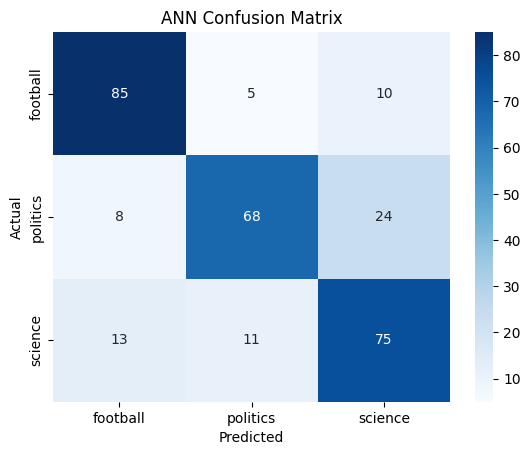

ANN Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.81      0.68      0.74       100
           2       0.69      0.76      0.72        99

    accuracy                           0.76       299
   macro avg       0.77      0.76      0.76       299
weighted avg       0.77      0.76      0.76       299



In [31]:
plot_confusion_matrix(y_test, y_pred_ann, label_encoder.classes_, "ANN Confusion Matrix")
print("ANN Classification Report:\n", classification_report(y_test, y_pred_ann))

In [32]:
def create_cnn(input_shape, num_classes):
    model = Sequential([
        tf.keras.layers.Reshape((input_shape, 1), input_shape=(input_shape,)),
        Conv1D(64, 3, activation='relu'),
        Flatten(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [33]:
cnn_model = create_cnn(input_shape=X_train.shape[1], num_classes=3)
history_cnn = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100


c:\Users\Tanay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4864 - loss: 0.9790 - val_accuracy: 0.7425 - val_loss: 0.6792
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7833 - loss: 0.6058 - val_accuracy: 0.7625 - val_loss: 0.5901
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8225 - loss: 0.4736 - val_accuracy: 0.7659 - val_loss: 0.5818
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8306 - loss: 0.4263 - val_accuracy: 0.7625 - val_loss: 0.6150
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8668 - loss: 0.3709 - val_accuracy: 0.7592 - val_loss: 0.6366
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8593 - loss: 0.3496 - val_accuracy: 0.7525 - val_loss: 0.6834
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8480 - loss: 0.3520 - val_accuracy: 0.7358 - val_loss: 0.7424
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8726 - loss: 0.3031 - val_accuracy: 0.7559 - val_l

In [34]:
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


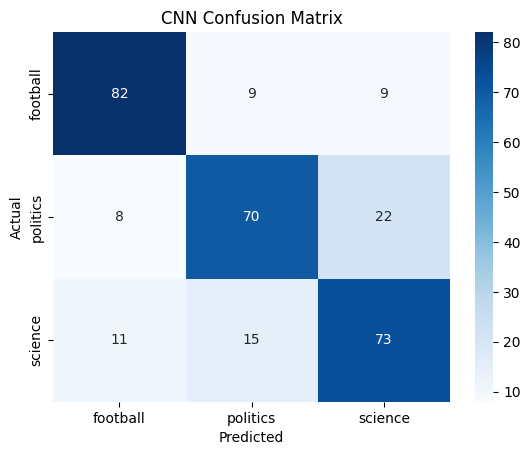

CNN Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       100
           1       0.74      0.70      0.72       100
           2       0.70      0.74      0.72        99

    accuracy                           0.75       299
   macro avg       0.75      0.75      0.75       299
weighted avg       0.75      0.75      0.75       299



In [35]:
plot_confusion_matrix(y_test, y_pred_cnn, label_encoder.classes_, "CNN Confusion Matrix")
print("CNN Classification Report:\n", classification_report(y_test, y_pred_cnn))

In [36]:
def create_lstm(input_shape, num_classes):
    model = Sequential([
        tf.keras.layers.Reshape((input_shape, 1), input_shape=(input_shape,)),
        LSTM(64, return_sequences=False),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [37]:
lstm_model = create_lstm(input_shape=X_train.shape[1], num_classes=3)
history_lstm = lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100


c:\Users\Tanay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.3033 - loss: 1.0997 - val_accuracy: 0.3311 - val_loss: 1.0979
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.3577 - loss: 1.0978 - val_accuracy: 0.3378 - val_loss: 1.0971
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.3859 - loss: 1.0967 - val_accuracy: 0.4047 - val_loss: 1.0954
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.3782 - loss: 1.1057 - val_accuracy: 0.3645 - val_loss: 1.0965
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.3528 - loss: 1.0976 - val_accuracy: 0.3913 - val_loss: 1.0950
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.3953 - loss: 1.0940 - val_accuracy: 0.3579 - val_loss: 1.0934
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.3853 - loss: 1.0934 - val_accuracy: 0.4147 - val_loss: 1.0911
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.3734 - loss: 1.0933 - val_accuracy: 0.4281 - val

In [38]:
lstm_test_loss, lstm_test_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)
y_pred_lstm = np.argmax(lstm_model.predict(X_test), axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


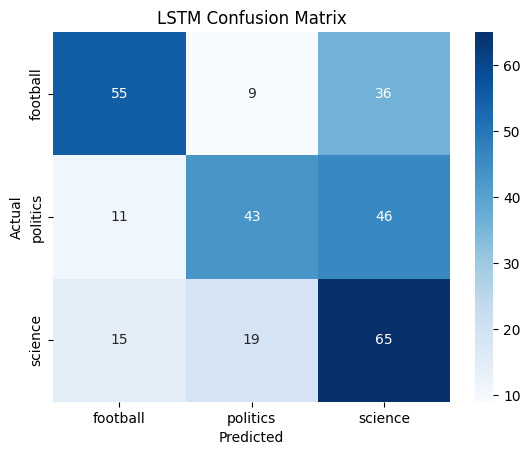

LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.55      0.61       100
           1       0.61      0.43      0.50       100
           2       0.44      0.66      0.53        99

    accuracy                           0.55       299
   macro avg       0.58      0.55      0.55       299
weighted avg       0.58      0.55      0.55       299



In [39]:
plot_confusion_matrix(y_test, y_pred_lstm, label_encoder.classes_, "LSTM Confusion Matrix")
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm))

In [40]:
print(f"ANN Accuracy: {ann_test_accuracy:.2f}")
print(f"CNN Accuracy: {cnn_test_accuracy:.2f}")
print(f"LSTM Accuracy: {lstm_test_accuracy:.2f}")

ANN Accuracy: 0.76
CNN Accuracy: 0.75
LSTM Accuracy: 0.55
